In [12]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from numpy.linalg import inv

# Quation 4(1)

In [6]:
# Define the function
def objective_function(x):  # here a=4  b=50
    return (4 + 1 - x[0])**2 + 50 * (x[1] - x[0]**2)**2

# Define the gradient of the function
def gradient(x):
    dfdx1 = -2 * (4 + 1 - x[0]) - 200 * x[0] * (x[1] - x[0]**2)
    dfdx2 = 100 * (x[1] - x[0]**2)
    return np.array([dfdx1, dfdx2])

# Define the Hessian of the function
def hessian(x):
    d2fdx1 = 2 - 200 * (x[1] - 3*x[0]**2)
    d2fdx2 = 100
    d2fdx1dx2 = -200* x[0]
    return np.array([[d2fdx1, d2fdx1dx2], [d2fdx1dx2, d2fdx2]])

# Initial guess
x0 = np.array([0, 0])

# Stopping tolerance
tau = 1e-6

# Apply Newton's Method using SciPy's minimize function
result = minimize(objective_function, x0, method='Newton-CG', jac=gradient, hess=hessian, tol=tau)

# Extract minimizer and minimum function value
minimizer = result.x
min_value = result.fun

print("Minimizer:", minimizer)
print("Minimum Function Value:", min_value)


Minimizer: [ 5. 25.]
Minimum Function Value: 9.880708207565185e-22


# Quation 4(2)

Is the minimizer in (1) unique?

The code will provide a specific numerical solution as the minimizer. Whether this minimizer is unique depends on the characteristics of the function.

Is it a local or global minimum?

The Newton's Method used in the code finds a local minimum. It doesn't guarantee finding the global minimum, especially for non-convex functions. The obtained solution is valid in the local neighborhood of the initial guess.
Is the function f(x) convex?

The function  is not convex. It has a non-convex term 
in the second part, and the presence of this term makes the overall function non-convex.

\textbf{Is the minimizer in (1) unique?}

The code will provide a specific numerical solution as the minimizer. Whether this minimizer is unique depends on the characteristics of the function.

\textbf{Is it a local or global minimum?}

The Newton's Method used in the code finds a local minimum. It doesn't guarantee finding the global minimum, especially for non-convex functions. The obtained solution is valid in the local neighborhood of the initial guess.

\textbf{Is the function \(f(x)\) convex?}

The function \(f(x_1, x_2) = (4 + 1 - x_1)^2 + 50 \cdot (x_2 - x_1^2)^2\) is not convex. It has a non-convex term \(x_2 - x_1^2\) in the second part, and the presence of this term makes the overall function non-convex.


Is the minimizer in (1) unique?
Ans:-

# Quation 4(3)

Tolerance	Minimizer		Objective Value		Iterations
1e-01		[ 4.99894769 24.98947801]		0.0000		5
1e-02		[ 4.99894769 24.98947801]		0.0000		5
1e-03		[ 5. 25.]		0.0000		7
1e-04		[ 5. 25.]		0.0000		7
1e-05		[ 5. 25.]		0.0000		7
1e-06		[ 5. 25.]		0.0000		7


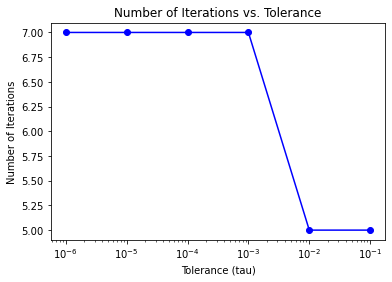

In [14]:
# Define the function
def objective_function(x):  
    return (4 + 1 - x[0])**2 + 50 * (x[1] - x[0]**2)**2

# Define the gradient of the function
def gradient(x):
    dfdx1 = -2 * (4 + 1 - x[0]) - 200 * x[0] * (x[1] - x[0]**2)
    dfdx2 = 100 * (x[1] - x[0]**2)
    return np.array([dfdx1, dfdx2])

# Define the Hessian of the function
def hessian(x):
    d2fdx1 = 2 - 200 * (x[1] - 3*x[0]**2)
    d2fdx2 = 100
    d2fdx1dx2 = -200* x[0]
    return np.array([[d2fdx1, d2fdx1dx2], [d2fdx1dx2, d2fdx2]])

# here use the Algorithm 3: Newton's Method
def newtons_method(x0, tau):
    xk = x0.copy()
    iteration = 0
    while np.linalg.norm(gradient(xk)) > tau:
        xk = xk - inv(hessian(xk)) @ gradient(xk)
        iteration += 1
    return xk, objective_function(xk), iteration

# Analyze behavior for different tolerance values
tolerances = [10**(-p) for p in range(1,7)]
results = []

for tau in tolerances:
    x_min, obj_value, iterations = newtons_method([-1.5, 1.5], tau)
    results.append([tau, x_min, obj_value, iterations])

# Display results in a tabular form
print("Tolerance\tMinimizer\t\tObjective Value\t\tIterations")
for result in results:
    print(f"{result[0]:.0e}\t\t{result[1]}\t\t{result[2]:.4f}\t\t{result[3]}")

# Generate a plot illustrating the relationship between the number of iterations and tau values
tau_values = [result[0] for result in results]
iteration_values = [result[3] for result in results]

plt.figure()
plt.semilogx(tau_values, iteration_values, marker='o', linestyle='-', color='b')
plt.xlabel('Tolerance (tau)')
plt.ylabel('Number of Iterations')
plt.title('Number of Iterations vs. Tolerance')
plt.show()

